# Fundamental Concepts of tensors using Tensorflow

* Introduction to tensors
* Getting information from tensors
* Manipulation tensors
* Tensors and Numpy
* Using @tf.function(Way to speed up regular Python functions)
* Using GPUs with tensorflow
* Exercise

## Introduction to tensors

In [109]:
import tensorflow as tf
print(tf.__version__)

2.8.2


### Creating Tensors with `tf.constant()`

As mentioned before, in general, you usually won't create tensors yourself. This is because TensorFlow has modules built-in (such as [`tf.io`](https://www.tensorflow.org/api_docs/python/tf/io) and [`tf.data`](https://www.tensorflow.org/guide/data)) which are able to read your data sources and automatically convert them to tensors and then later on, neural network models will process these for us.

But for now, because we're getting familar with tensors themselves and how to manipulate them, we'll see how we can create them ourselves.

We'll begin by using [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant).

In [110]:
scalar= tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

### Dimensions of a tensor

> ndim stands for number of dimensions

In [111]:
scalar.ndim

0

### Create a vector

In [112]:
vector=tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [113]:
vector.ndim

1

### Creating matrix

In [114]:
matrix=tf.constant([[10,10],[7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 10],
       [ 7, 10]], dtype=int32)>

In [115]:
matrix.ndim

2

In [116]:
anotherMatrix=tf.constant([[10.,7.],[3.,5.],[6.,9.]], dtype=tf.float16)
anotherMatrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  5.],
       [ 6.,  9.]], dtype=float16)>

In [117]:
anotherMatrix.ndim

2

### Creating Tensor

By default, TensorFlow creates tensors with either an `int32` or `float32` datatype.

This is known as [32-bit precision](https://en.wikipedia.org/wiki/Precision_(computer_science) (the higher the number, the more precise the number, the more space it takes up on your computer).

In [118]:
tensor=tf.constant([[[10.,7.],[3.,5.],[6.,9.]]], dtype=tf.float16)
tensor

<tf.Tensor: shape=(1, 3, 2), dtype=float16, numpy=
array([[[10.,  7.],
        [ 3.,  5.],
        [ 6.,  9.]]], dtype=float16)>

In [119]:
tensor.ndim

3

This is known as a rank 3 tensor (3-dimensions), however a tensor can have an arbitrary (unlimited) amount of dimensions.

For example, you might turn a series of images into tensors with shape (224, 224, 3, 32), where:
* 224, 224 (the first 2 dimensions) are the height and width of the images in pixels.
* 3 is the number of colour channels of the image (red, green blue).
* 32 is the batch size (the number of images a neural network sees at any one time).

All of the above variables we've created are actually tensors. But you may also hear them referred to as their different names (the ones we gave them):
* **scalar**: a single number. A scalar is known as a rank 0 tensor. Because it has no dimensions (it's just a number).
* **vector**: a number with direction (e.g. wind speed with direction).
* **matrix**: a 2-dimensional array of numbers.
* **tensor**: an n-dimensional array of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector). 

To add to the confusion, the terms matrix and tensor are often used interchangeably.

Going forward since we're using TensorFlow, everything we refer to and use will be tensors.

For more on the mathematical difference between scalars, vectors and matrices see the [visual algebra post by Math is Fun](https://www.mathsisfun.com/algebra/scalar-vector-matrix.html).

![difference between scalar, vector, matrix, tensor](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

### Creating tensors with `tf.Variable`

In [120]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [121]:
# Create the same tensor with tf.Variable() as above

changeable_tensor= tf.Variable([10,7])
unchangeable_tensor= tf.constant([10,7])

changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [122]:
changeable_tensor[0].assign(5)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 7], dtype=int32)>

In [123]:
# unchangeable_tensor[0].assgin(5)
# unchangeable_tensor

### Creating Random Tensors

> Random tensors are tensors of some arbitary size which contains random numbers

In [124]:
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffeling order of elements

In [125]:
not_shiffled= tf.constant([[10,7], [3,4],[2,5]])
not_shiffled, not_shiffled.ndim

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4],
        [ 2,  5]], dtype=int32)>, 2)

In [126]:
tf.random.shuffle(not_shiffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [127]:
tf.random.shuffle(not_shiffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [128]:
tf.random.set_seed(42)  # Global level random Seed
tf.random.shuffle(not_shiffled, seed=42) # Operational level random Seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [129]:
tf_ones=tf.ones([5,5])
tf_ones

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [130]:
tf_zeroes=tf.zeros([2,2])
tf_zeroes

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

### Convert NumPy arrays into tensors

> The main difference between Numpy arrays and tensorflow tensors is that tensors can be run on a GPU(much faster)


X= tf.constants(some_matrix) , **Capital for maxtrix or tensor**

y= tf.constant(vector) **non-capital for vector**

In [131]:
import numpy as np

numpy_A= np.arange(1, 25, dtype=np.int32)
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [132]:
A= tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [133]:
A= tf.Variable(numpy_A)
A

<tf.Variable 'Variable:0' shape=(24,) dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [134]:
B= tf.constant(numpy_A, shape=(2,3,4))
B

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

In [135]:
A, B

(<tf.Variable 'Variable:0' shape=(24,) dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>,
 <tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>)

In [136]:
2*3*4

24

In [137]:
B= tf.constant(numpy_A, shape=(2,12))
B

<tf.Tensor: shape=(2, 12), dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>

In [138]:
A.shape, B.shape

(TensorShape([24]), TensorShape([2, 12]))

### Getting more information from tensors

* Shape
* Rank
* Axis or dimensions
* Size

In [139]:
rank_4_tensor=tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [140]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [141]:
rank_4_tensor[0][1]

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [142]:
rank_4_tensor.shape, tf.shape(rank_4_tensor), rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]),
 <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2, 3, 4, 5], dtype=int32)>,
 4,
 <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [143]:
2*3*4*5

120

### Various attributes of tensors

In [144]:
print(rank_4_tensor.dtype)
print("\n")
print(rank_4_tensor.ndim)
print("\n")
print(rank_4_tensor.shape)
print("\n")
print(rank_4_tensor[0])
print("\n")
print(rank_4_tensor.shape[0])
print("\n")
print(rank_4_tensor[-1])
print("\n")
print(rank_4_tensor.shape[-1])
print("\n")
print(tf.size(rank_4_tensor))
print("\n")
print(tf.size(rank_4_tensor).numpy())
print("\n")

<dtype: 'float32'>


4


(2, 3, 4, 5)


tf.Tensor(
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]], shape=(3, 4, 5), dtype=float32)


2


tf.Tensor(
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]], shape=(3, 4, 5), dtype=float32)


5


tf.Tensor(120, shape=(), dtype=int32)


120




### Indexing Tensors

In [145]:
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [146]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [147]:
# Get the first element from each dimension from each index except for the final one
rank_4_tensor[:1,:1,:,:1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [148]:
 rank_2_tensor= tf.constant([[1,2],[3,4]])
 rank_2_tensor,rank_2_tensor.ndim

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]], dtype=int32)>, 2)

In [149]:
# Get the last item of each row 
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 4], dtype=int32)>

### Adding an extra dimension to a tensor

In [150]:
rank_2_tensor= rank_2_tensor[..., tf.newaxis]
rank_2_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

#### Alternative to **tf.newaxis**

In [151]:
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis

<tf.Tensor: shape=(2, 2, 1, 1), dtype=int32, numpy=
array([[[[1]],

        [[2]]],


       [[[3]],

        [[4]]]], dtype=int32)>

In [152]:
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[1],
         [2]],

        [[3],
         [4]]]], dtype=int32)>

In [153]:
rank_2_tensor.shape

TensorShape([2, 2, 1])

### Tensor operations and manipulating them

In [154]:
rank_2_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

In [155]:
rank_2_tensor + 10, rank_2_tensor - 10, rank_2_tensor * 10, rank_2_tensor / 10, rank_2_tensor % 10

(<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[11],
         [12]],
 
        [[13],
         [14]]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[-9],
         [-8]],
 
        [[-7],
         [-6]]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [20]],
 
        [[30],
         [40]]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=float64, numpy=
 array([[[0.1],
         [0.2]],
 
        [[0.3],
         [0.4]]])>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[1],
         [2]],
 
        [[3],
         [4]]], dtype=int32)>)

In [156]:
tf.multiply(rank_2_tensor,10)

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [20]],

       [[30],
        [40]]], dtype=int32)>

## Matrix Multiplication

> One of the most used operation in ML as well as in DL.


* tf.matmul()
* tf.tensordot()

In [157]:
matrix_1= tf.constant([[1,2,5], [7,2,1], [3,3,3,]])
matrix_1

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 5],
       [7, 2, 1],
       [3, 3, 3]], dtype=int32)>

In [158]:
matrix_2=tf.constant([[3,5],[6,7],[1,8]])
matrix_2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 5],
       [6, 7],
       [1, 8]], dtype=int32)>

In [159]:
tf.matmul(matrix_1, matrix_2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [160]:
# matrix_1 * matrix_2

In [161]:
matrix_1 @ matrix_2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [162]:
matrix_3=tf.constant([[2,2], [3,3],[3,2],[4,2],[5,1],[5,2]])
matrix_3

<tf.Tensor: shape=(6, 2), dtype=int32, numpy=
array([[2, 2],
       [3, 3],
       [3, 2],
       [4, 2],
       [5, 1],
       [5, 2]], dtype=int32)>

In [163]:
# matrix_1 @ matrix_3

In [164]:
# matrix_3=matrix_3[..., tf.newaxis]
# matrix_3

In [165]:
matrix_3=tf.reshape(matrix_3, shape=(3,4))
matrix_3

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[2, 2, 3, 3],
       [3, 2, 4, 2],
       [5, 1, 5, 2]], dtype=int32)>

In [166]:
matrix_1 @ matrix_3

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[33, 11, 36, 17],
       [25, 19, 34, 27],
       [30, 15, 36, 21]], dtype=int32)>

In [167]:
matrix_1, matrix_3

(<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[1, 2, 5],
        [7, 2, 1],
        [3, 3, 3]], dtype=int32)>,
 <tf.Tensor: shape=(3, 4), dtype=int32, numpy=
 array([[2, 2, 3, 3],
        [3, 2, 4, 2],
        [5, 1, 5, 2]], dtype=int32)>)

In [168]:
tf.tensordot(tf.transpose(matrix_1), matrix_2, axes=1)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[48, 78],
       [21, 48],
       [24, 56]], dtype=int32)>

### Changing the datatype of a tensor

In [169]:
tf.__version__

'2.8.2'

In [170]:
B= tf.constant([7.,2.,3.,5.])
B.dtype

tf.float32

In [171]:
C= tf.constant([7,2,3,5])
C.dtype

tf.int32

#### Change from float32 to float16(reduced precision)

In [172]:
D= tf.cast(B, dtype=tf.float16)
B, D

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([7., 2., 3., 5.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float16, numpy=array([7., 2., 3., 5.], dtype=float16)>)

#### Change from int32 to float32

In [173]:
E= tf.cast(C, dtype=tf.float32)
C, E

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([7, 2, 3, 5], dtype=int32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([7., 2., 3., 5.], dtype=float32)>)

### Aggregrating Tensors

> Condensing tensors from multiple values down to a smaller amount of values.

#### Absolute Values

In [174]:
F= tf.constant([-1,-5,2,6,-3])
F

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([-1, -5,  2,  6, -3], dtype=int32)>

In [175]:
tf.abs(F)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 5, 2, 6, 3], dtype=int32)>

### Forms of Aggregration

* Minimum
* Maximum
* Mean of a tensor
* Sum of a tensor

In [176]:
tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=int32, numpy=-5>

In [177]:
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [178]:
tf.reduce_mean(F)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [179]:
F

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([-1, -5,  2,  6, -3], dtype=int32)>

In [180]:
E

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([7., 2., 3., 5.], dtype=float32)>

In [181]:
tf.reduce_sum(F)

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [182]:
tf.math.reduce_variance(F)

TypeError: ignored

In [183]:
tf.math.reduce_std(F)

TypeError: ignored

In [184]:
tf.math.reduce_variance(E)

<tf.Tensor: shape=(), dtype=float32, numpy=3.6875>

In [185]:
tf.math.reduce_std(E)

<tf.Tensor: shape=(), dtype=float32, numpy=1.9202864>

### Tensorflow Probability

In [186]:
import tensorflow_probability as tfp

In [187]:
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=float32, numpy=3.6875>

In [188]:
tfp.stats.stddev(E)

<tf.Tensor: shape=(), dtype=float32, numpy=1.9202864>

### Find the positional maximum and minimum

In [189]:
E

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([7., 2., 3., 5.], dtype=float32)>

In [190]:
tf.math.reduce_max(E) # Returns the maximum value

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [191]:
tf.math.argmax(E) # Returns the index of the maximum value

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [192]:
tf.math.reduce_min(E) # Returns the minimum value

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [193]:
tf.math.argmin(E) # Returns the index of the minimum value

<tf.Tensor: shape=(), dtype=int64, numpy=1>

### Squeezing the tensor

> Removing all single dimensions

In [194]:
tf.random.set_seed(69)
G= tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[5.3272355e-01, 7.6764774e-01, 7.6187789e-01, 2.5841391e-01,
           5.6738329e-01, 1.3471830e-01, 4.7002292e-01, 3.5524964e-02,
           3.8393617e-01, 1.6981947e-01, 4.4886672e-01, 5.6220615e-01,
           5.1936674e-01, 7.7804303e-01, 3.4848118e-01, 5.6664705e-01,
           6.1973441e-01, 3.1386054e-01, 5.0863159e-01, 1.2493873e-01,
           6.2286139e-01, 3.9865887e-01, 8.9437950e-01, 8.0250156e-01,
           6.0539913e-01, 6.2322211e-01, 6.9168448e-01, 3.2230341e-01,
           5.5286503e-01, 6.8580091e-01, 9.3656206e-01, 7.2395742e-01,
           9.7975111e-01, 6.0671389e-01, 9.5694554e-01, 8.5030973e-01,
           2.1026397e-01, 6.1866856e-01, 7.4614286e-01, 9.3863714e-01,
           7.7380419e-01, 9.8344505e-01, 8.8855958e-01, 5.8377409e-01,
           2.5783134e-01, 4.4455886e-02, 1.0716915e-04, 4.2767525e-03,
           4.6135592e-01, 3.7454653e-01]]]]], dtype=float32)>

In [195]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [196]:
G_squeezed= tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([5.3272355e-01, 7.6764774e-01, 7.6187789e-01, 2.5841391e-01,
        5.6738329e-01, 1.3471830e-01, 4.7002292e-01, 3.5524964e-02,
        3.8393617e-01, 1.6981947e-01, 4.4886672e-01, 5.6220615e-01,
        5.1936674e-01, 7.7804303e-01, 3.4848118e-01, 5.6664705e-01,
        6.1973441e-01, 3.1386054e-01, 5.0863159e-01, 1.2493873e-01,
        6.2286139e-01, 3.9865887e-01, 8.9437950e-01, 8.0250156e-01,
        6.0539913e-01, 6.2322211e-01, 6.9168448e-01, 3.2230341e-01,
        5.5286503e-01, 6.8580091e-01, 9.3656206e-01, 7.2395742e-01,
        9.7975111e-01, 6.0671389e-01, 9.5694554e-01, 8.5030973e-01,
        2.1026397e-01, 6.1866856e-01, 7.4614286e-01, 9.3863714e-01,
        7.7380419e-01, 9.8344505e-01, 8.8855958e-01, 5.8377409e-01,
        2.5783134e-01, 4.4455886e-02, 1.0716915e-04, 4.2767525e-03,
        4.6135592e-01, 3.7454653e-01], dtype=float32)>, TensorShape([50]))

### One Hot Encoding

> It is a form of numerical encoding.

In [197]:
someList=[0,1,2,3,4,5]

tf.one_hot(someList, depth=6)

<tf.Tensor: shape=(6, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [198]:
someList=[[0,1],[2,3],[4,5]]

tf.one_hot(someList, depth=6)

<tf.Tensor: shape=(3, 2, 6), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]],

       [[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]]], dtype=float32)>

### Tensors with Numpy Array

> Tensorflow interacts with Numpy arrays directly

#### Creating tensor from numpy array

In [199]:
J=tf.constant(np.array([3.,7.]))
J

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([3., 7.])>

#### Converting tensor back to numpy array

In [200]:
np.array(J), type(np.array(J))

(array([3., 7.]), numpy.ndarray)

In [201]:
J.numpy(), type(J.numpy())

(array([3., 7.]), numpy.ndarray)

#### Default Types

In [202]:
numpy_J=tf.constant([np.array([3.,7.])])
tensor_J=tf.constant([3.,7.])

In [203]:
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

In [204]:
!nvidia-smi

Mon Jul  4 05:09:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |    266MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Exercise

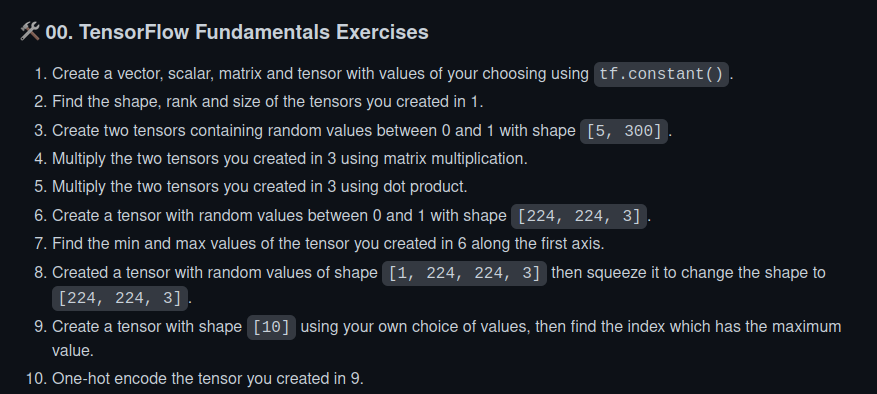

In [205]:
vector= tf.constant([1,2,3])
scalar= tf.constant([1,2,3])
matrix= tf.constant([[1,2,3],[4,5,6]])

In [206]:
vector.shape, scalar.shape, matrix.shape

(TensorShape([3]), TensorShape([3]), TensorShape([2, 3]))

In [209]:
random= tf.random.uniform(shape=[5,300])
random


<tf.Tensor: shape=(5, 300), dtype=float32, numpy=
array([[0.6216024 , 0.21715796, 0.82227314, ..., 0.4070983 , 0.6445987 ,
        0.83410656],
       [0.54126227, 0.5809537 , 0.54659   , ..., 0.9756745 , 0.15846753,
        0.08773339],
       [0.20031321, 0.7614219 , 0.39034605, ..., 0.43138278, 0.9360678 ,
        0.6819711 ],
       [0.5777608 , 0.04499626, 0.04300141, ..., 0.260615  , 0.9956461 ,
        0.2125622 ],
       [0.5419458 , 0.47968936, 0.12248731, ..., 0.3929026 , 0.24408484,
        0.61974657]], dtype=float32)>

## Extra

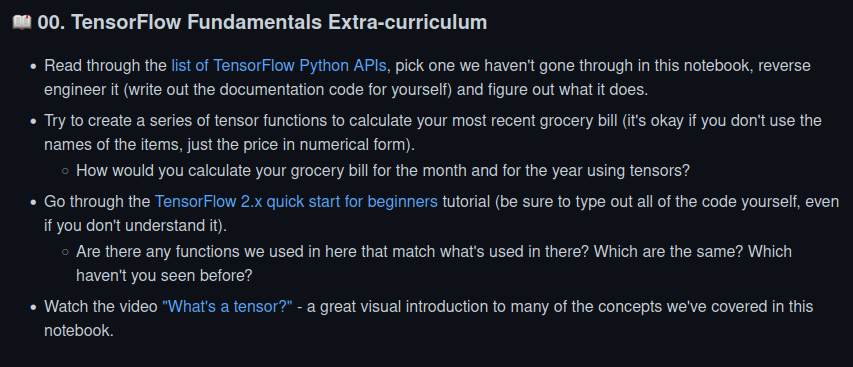